In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from xgboost import XGBClassifier 

In [2]:
df = pd.read_csv('data/GAMES.csv')
df


,game_id,1_opener_fip,1_opener_freshness,1_others_fip,1_others_freshness,1_woba,1_ooa,1_home,1_team,1_is_wildcard,2_opener_fip,2_opener_freshness,2_others_fip,2_others_freshness,2_woba,w_ooa,2_team,2_is_wildcard,is_playoff,result
0,ARI_COL_2017-10-04,3.43,17280.0,5.746000,80611.2,0.329,-2,0,ARI,0,9.91,96480.0,3.552857,66270.857143,0.332,21,COL,0,1,1
1,ARI_LAD_2017-10-06,16.16,96480.0,2.460000,61398.0,0.329,-2,1,ARI,0,10.58,8376.0,4.160000,40792.000000,0.330,-18,LAD,0,1,0
2,ARI_LAD_2017-10-07,2.71,72.0,3.926667,56.0,0.329,-2,1,ARI,0,6.66,8496.0,2.215000,18908.000000,0.330,-18,LAD,0,1,0
3,ARI_LAD_2017-10-09,3.56,8808.0,2.567500,48.0,0.330,-18,1,LAD,0,7.08,120.0,3.470000,60.000000,0.329,-2,ARI,0,1,1
4,ARI_LAD_2023-10-07,2.62,96480.0,5.735000,96.0,0.317,35,1,ARI,0,51.26,8640.0,5.926667,43600.000000,0.341,-4,LAD,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19776,TOR_WSN_2023-08-29,4.18,120.0,3.960000,96.0,0.324,9,0,TOR,0,4.66,144.0,3.706667,72.000000,0.309,-2,WSN,0,0,0
19777,TOR_WSN_2023-08-30,5.11,144.0,5.475000,48.0,0.309,-2,1,WSN,0,4.56,120.0,4.460000,72.000000,0.324,9,TOR,0,0,0
19778,TOR_WSN_2025-03-31,7.64,13536.0,1.600000,48.0,0.330,20,0,TOR,0,5.14,6876.0,9.640000,33.600000,0.302,-33,WSN,0,0,1
19779,TOR_WSN_2025-04-01,5.76,120.0,5.900000,20460.0,0.330,20,0,TOR,0,1.94,13200.0,7.363333,40.000000,0.302,-33,WSN,0,0,1


In [3]:
#here


## Random Forest

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report

# features and target 
X, y = df.drop(columns=['game_id', '1_team', '2_team', 'result']), df['result']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# fit model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# f1 
pred_test = rf.predict(X_test)
og_f1_test = f1_score(y_test, pred_test, average='weighted')
print(f"F1 score: {og_f1_test:.4f}")

# CM
CM_test = confusion_matrix(y_test, pred_test) 
print("\nConfusion Matrix:")
print(CM_test)
print("\nClassification Report:")
print(classification_report(y_test, pred_test))




F1 score: 0.7058

Confusion Matrix:
[[1727  715]
 [ 740 1764]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.71      0.70      2442
           1       0.71      0.70      0.71      2504

    accuracy                           0.71      4946
   macro avg       0.71      0.71      0.71      4946
weighted avg       0.71      0.71      0.71      4946



In [4]:
# RF
print("=" * 80)
print("Random Forest Grid Search")
print("=" * 80)

# param grid 
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# base rf 
rf_base = RandomForestClassifier(random_state=42)

# grid search
rf_grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=rf_param_grid,
    scoring='f1_weighted',
    cv=5,
    n_jobs=-1,
    verbose=1
)

rf_grid_search.fit(X_train, y_train)

print("\n" + "=" * 80)
print("Best Parameters:")
print("=" * 80)
for param, value in rf_grid_search.best_params_.items():
    print(f"  {param}: {value}")


# f1 score of best rf 
best_rf = rf_grid_search.best_estimator_
pred_best_rf = best_rf.predict(X_test)
f1_best_rf = f1_score(y_test, pred_best_rf, average='weighted')
print(f"\nBest Random Forest F1 score: {f1_best_rf:.4f}")
print(f"Default Random Forest F1 score: {og_f1_test:.4f}")
print(f"Improvement over default: {f1_best_rf - og_f1_test:.4f}")

# CM for best rf 
CM_best_rf = confusion_matrix(y_test, pred_best_rf)
print("\nBest Random Forest Confusion Matrix:")
print(CM_best_rf)
print("\nBest Random Forest Classification Report:")
print(classification_report(y_test, pred_best_rf))


Random Forest Grid Search
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Best Parameters:
  max_depth: 30
  max_features: sqrt
  min_samples_leaf: 2
  min_samples_split: 10
  n_estimators: 200

Best Random Forest F1 score: 0.7072
Default Random Forest F1 score: 0.7058
Improvement over default: 0.0014

Best Random Forest Confusion Matrix:
[[1710  732]
 [ 716 1788]]

Best Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.70      0.70      2442
           1       0.71      0.71      0.71      2504

    accuracy                           0.71      4946
   macro avg       0.71      0.71      0.71      4946
weighted avg       0.71      0.71      0.71      4946



## XGBoost

In [5]:
# XGBoost
print("=" * 80)
print("XGBoost Model")
print("=" * 80)

# Fit
xgb = XGBClassifier(random_state=42, eval_metric='logloss')
xgb.fit(X_train, y_train)

# f1 
pred_xgb = xgb.predict(X_test)
f1_xgb = f1_score(y_test, pred_xgb, average='weighted')
print(f"\nXGBoost F1 score: {f1_xgb:.4f}")
print(f"Random Forest F1 score: {og_f1_test:.4f}")
print(f"Difference: {f1_xgb - og_f1_test:.4f}")

# CM
CM_xgb = confusion_matrix(y_test, pred_xgb)
print("\nXGBoost Confusion Matrix:")
print(CM_xgb)
print("\nXGBoost Classification Report:")
print(classification_report(y_test, pred_xgb))


XGBoost Model

XGBoost F1 score: 0.6882
Random Forest F1 score: 0.7058
Difference: -0.0176

XGBoost Confusion Matrix:
[[1689  753]
 [ 789 1715]]

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.69      0.69      2442
           1       0.69      0.68      0.69      2504

    accuracy                           0.69      4946
   macro avg       0.69      0.69      0.69      4946
weighted avg       0.69      0.69      0.69      4946



In [21]:
# XGBoost Grid Search
print("=" * 80)
print("XGBoost Grid Search")
print("=" * 80)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_base = XGBClassifier(random_state=42, eval_metric='logloss')

grid_search = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("\nBest Parameters:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")
print(f"Best CV F1 Score: {grid_search.best_score_:.4f}")

best_xgb = grid_search.best_estimator_
pred_best_xgb = best_xgb.predict(X_test)

xgb_default = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_default.fit(X_train, y_train)
pred_xgb_default = xgb_default.predict(X_test)
f1_xgb = f1_score(y_test, pred_xgb_default, average='weighted')


XGBoost Grid Search
Fitting 5 folds for each of 48 candidates, totalling 240 fits

Best Parameters:
  colsample_bytree: 1.0
  learning_rate: 0.1
  max_depth: 3
  n_estimators: 200
  subsample: 0.8
Best CV F1 Score: 0.7071


## Feature Importance Analysis: Regular Season vs Post Season
f

In [4]:
print("=" * 80)
print("Regular Season vs Post Season")
print("=" * 80)

print(f"\nTotal games: {len(df)}")
print(f"Regular season games: {len(df[df['is_playoff'] == 0])}")
print(f"Post season games: {len(df[df['is_playoff'] == 1])}")


df_regular = df[df['is_playoff'] == 0].copy()
df_postseason = df[df['is_playoff'] == 1].copy()

print(f"\nRegular season shape: {df_regular.shape}")
print(f"Post season shape: {df_postseason.shape}")

feature_cols = [col for col in df.columns if col not in ['game_id', '1_team', '2_team', 'result', 'is_playoff']]
print(f"\nNumber of features: {len(feature_cols)}")
print(f"Features: {feature_cols}")

print("\n" + "=" * 80)
print("Missing Values Analysis")
print("=" * 80)
print("\nRegular Season Missing Values:")
missing_regular = df_regular[feature_cols].isnull().sum()
print(missing_regular[missing_regular > 0])

print("\nPost Season Missing Values:")
missing_postseason = df_postseason[feature_cols].isnull().sum()
print(missing_postseason[missing_postseason > 0])


Regular Season vs Post Season

Total games: 19781
Regular season games: 19464
Post season games: 317

Regular season shape: (19464, 20)
Post season shape: (317, 20)

Number of features: 15
Features: ['1_opener_fip', '1_opener_freshness', '1_others_fip', '1_others_freshness', '1_woba', '1_ooa', '1_home', '1_is_wildcard', '2_opener_fip', '2_opener_freshness', '2_others_fip', '2_others_freshness', '2_woba', 'w_ooa', '2_is_wildcard']

Missing Values Analysis

Regular Season Missing Values:
Series([], dtype: int64)

Post Season Missing Values:
Series([], dtype: int64)


In [10]:
print("=" * 80)
print("Feature Importance: Regular Season")
print("=" * 80)

X_regular = df_regular[feature_cols].copy()
y_regular = df_regular['result'].copy()

# imputation 
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X_regular_imputed = pd.DataFrame(
    imputer.fit_transform(X_regular),
    columns=X_regular.columns,
    index=X_regular.index
)


X_regular_train, X_regular_test, y_regular_train, y_regular_test = train_test_split(
    X_regular_imputed, y_regular, test_size=0.2, random_state=42
)

# XGBoost 
xgb_regular = XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    n_estimators=200,
    max_depth=3,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=1.0
)
xgb_regular.fit(X_regular_train, y_regular_train)

# Get feature importance
feature_importance_regular = pd.DataFrame({
    'feature': feature_cols,
    'importance': xgb_regular.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 15 Most Important Features:")
print(feature_importance_regular.head(15).to_string(index=False))

# evaluation
pred_regular = xgb_regular.predict(X_regular_test)
f1_regular = f1_score(y_regular_test, pred_regular, average='weighted')
print(f"\nRegular Season XGBoost F1 Score: {f1_regular:.4f}")


Feature Importance: Regular Season

Top 15 Most Important Features:
           feature  importance
      1_others_fip    0.241036
      2_others_fip    0.222969
1_others_freshness    0.084393
2_others_freshness    0.081908
      2_opener_fip    0.071076
            1_home    0.063928
      1_opener_fip    0.058401
            2_woba    0.044060
            1_woba    0.042821
             1_ooa    0.023941
             w_ooa    0.023420
2_opener_freshness    0.022333
1_opener_freshness    0.019714
     1_is_wildcard    0.000000
     2_is_wildcard    0.000000

Regular Season XGBoost F1 Score: 0.6964


In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report

X_regular = df_regular[feature_cols].copy()
y_regular = df_regular['result'].copy()

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X_regular_imputed = pd.DataFrame(
    imputer.fit_transform(X_regular),
    columns=X_regular.columns,
    index=X_regular.index
)

print("=" * 80)
print("Feature Importance: Post Season")
print("=" * 80)

X_postseason = df_postseason[feature_cols].copy()
y_postseason = df_postseason['result'].copy()

# missing values 
X_postseason_imputed = pd.DataFrame(
    imputer.transform(X_postseason),
    columns=X_postseason.columns,
    index=X_postseason.index
)

# split post season data 
X_postseason_train, X_postseason_test, y_postseason_train, y_postseason_test = train_test_split(
        X_postseason_imputed, y_postseason, test_size=0.2, random_state=42
    )

# Train XGBoost on post season data
xgb_postseason = XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    n_estimators=200,
    max_depth=3,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=1.0
)
xgb_postseason.fit(X_postseason_train, y_postseason_train)

# Get feature importance
feature_importance_postseason = pd.DataFrame({
    'feature': feature_cols,
    'importance': xgb_postseason.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 15 Most Important Features (Post Season):")
print(feature_importance_postseason.head(15).to_string(index=False))

# Evaluate model
if len(X_postseason_test) > 0 and len(X_postseason_test) != len(X_postseason_train):
    pred_postseason = xgb_postseason.predict(X_postseason_test)
    f1_postseason = f1_score(y_postseason_test, pred_postseason, average='weighted')
    print(f"\nPost Season XGBoost F1 Score: {f1_postseason:.4f}")
else:
    print("\nPost Season dataset too small for test evaluation")


Feature Importance: Post Season

Top 15 Most Important Features (Post Season):
           feature  importance
      2_opener_fip    0.118091
      1_others_fip    0.087626
      2_others_fip    0.086408
            2_woba    0.078724
      1_opener_fip    0.078283
1_others_freshness    0.073588
             w_ooa    0.071935
2_others_freshness    0.062572
            1_home    0.059622
            1_woba    0.054027
             1_ooa    0.051832
2_opener_freshness    0.051824
1_opener_freshness    0.049794
     2_is_wildcard    0.045859
     1_is_wildcard    0.029816

Post Season XGBoost F1 Score: 0.7334


feature importance


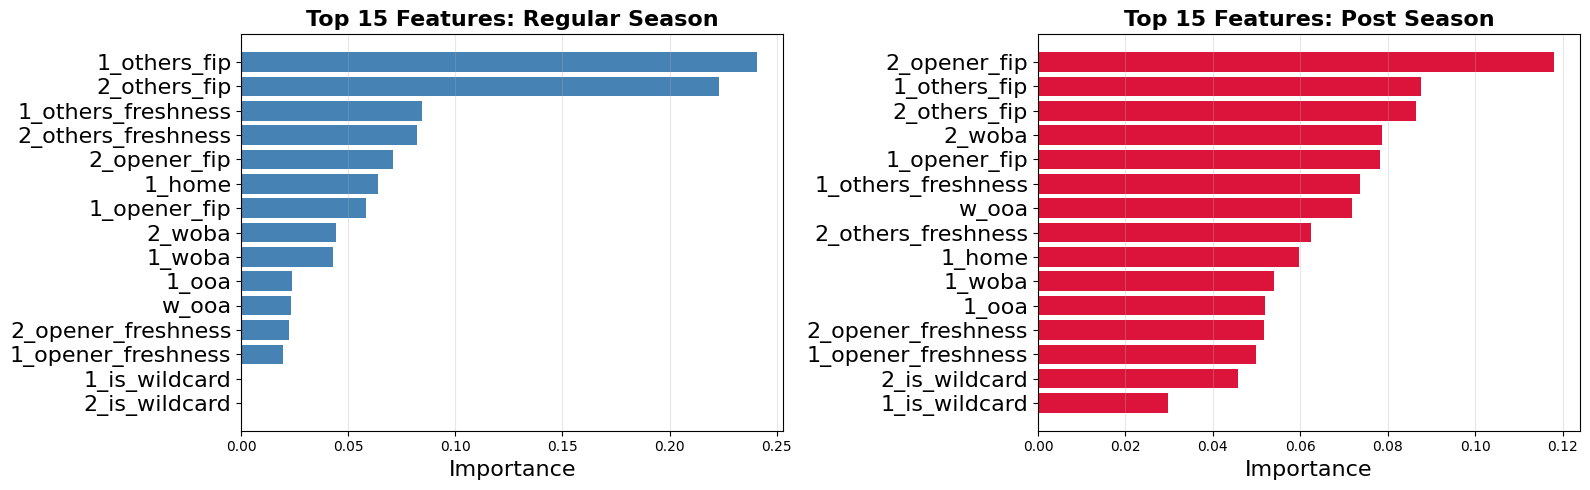

In [19]:
print("=" * 80)
print("feature importance")
print("=" * 80)
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot 1
top_n = 15
ax1 = axes[0]
top_regular = feature_importance_regular.head(top_n)
ax1.barh(range(len(top_regular)), top_regular['importance'], color='steelblue')
ax1.set_yticks(range(len(top_regular)))
ax1.set_yticklabels(top_regular['feature'], fontsize=16)
ax1.set_xlabel('Importance', fontsize=16)
ax1.set_title(f'Top {top_n} Features: Regular Season', fontsize=16, fontweight='bold')
ax1.invert_yaxis()
ax1.grid(axis='x', alpha=0.3)

# Plot 2
ax2 = axes[1]
top_postseason = feature_importance_postseason.head(top_n)
ax2.barh(range(len(top_postseason)), top_postseason['importance'], color='crimson')
ax2.set_yticks(range(len(top_postseason)))
ax2.set_yticklabels(top_postseason['feature'], fontsize=16)
ax2.set_xlabel('Importance', fontsize=16)
ax2.set_title(f'Top {top_n} Features: Post Season', fontsize=16, fontweight='bold')
ax2.invert_yaxis()
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('Paper/figures/Top15.pdf')


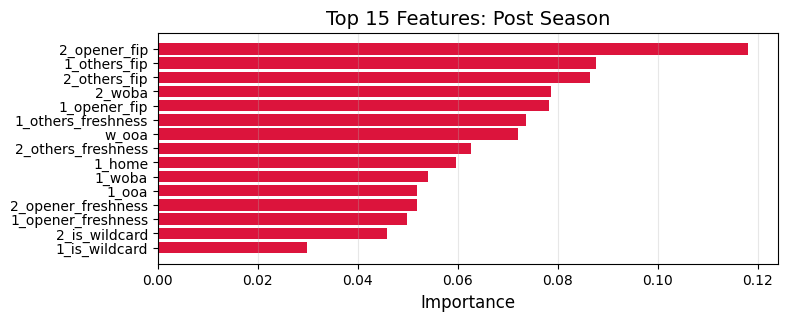

In [20]:
top_postseason = feature_importance_postseason.head(top_n)
plt.figure(figsize=(8, 3))

plt.barh(range(len(top_postseason)), top_postseason['importance'], color='crimson')

# Set tick positions AND their labels in one call
plt.yticks(
    range(len(top_postseason)),
    top_postseason['feature']
)

plt.xlabel('Importance', fontsize=12)
plt.title(f'Top {top_n} Features: Post Season', fontsize=14)

plt.gca().invert_yaxis()   # invert y-axis using the current axis
plt.grid(axis='x', alpha=0.3)

plt.savefig("Paper/figures/features_importance.pdf", bbox_inches="tight")
